# Módulo de Programação Python

# Trilha Python - Aula 41/42: Web Scraping: Automação com Selenium 

<img align="center" style="padding-right:10px;" src="Figuras/aula-31_fig_01.png">

## Automatizando o processo de coleta de dados.

Na aula anterior vimos como usar o __Requests__ e o  __Beautiful Soup__
para extrair informaçÕes de requisições feitas a servidores __WEB__. 

Entretanto o uso destes recursos nem sempre é suficiente para coletar as informações que desejamos.

Vejamos o seguinte exemplo.

<!DOCTYPE html>
<html lang="pt-BR">
 <head>
  <meta charset="utf-8"/>
  <meta content="AmFMpMe9tdD7tYHZ5DTQG/aRAYYkWIQDI/+Hwz5Y7OagTtDB3LA01RMKTpQ8jCqukCmZ7HDuCpEwx7WwAiFBywoAAAByeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb20uYnI6NDQzIiwiZmVhdHVyZSI6IkxvbmdBbmltYXRpb25GcmFtZVRpbWluZyIsImV4cGlyeSI6MTcwOTY4MzE5OSwiaXNTdWJkb21haW4iOnRydWV9" http-equiv="origin-trial"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   cepedi ilhéus - Pesquisa Google
  </title>
  <script nonce="GKtRPgGS0L-918t8fVfeoQ">
   (function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");bre
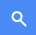
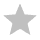
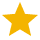
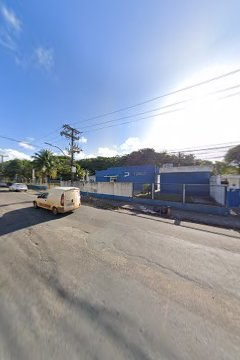

In [4]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.google.com/search?q=cepedi+ilh%C3%A9us'
response = requests.get(url)
search = BeautifulSoup(response.text, 'html.parser')
print(search.prettify())

Agora vamos procurar pelo painel onde estão os resultados da busca.

In [5]:
search = search.find('div', class_='g')
if search:
    print(search.prettify())
else: 
    print('Nada encontrado')

Nada encontrado


A pergunta é: Por que um _tag_ que existe na página não pode ser encontrado?

A resposta é relativamente simples: A página capturada pela requisição contem, fundamentalmente, scripts que serão executados do lado do cliente. Ou seja, em muitos casos a página é, de fato, renderizada no browser do cliente. 

Vamos utilizar então uma ferramenta para automatizar o processo de coleta, controlando um browser e capturando a página após a renderização. 

In [6]:
#pip install selenium


Aqui o [link](https://selenium-python.readthedocs.io) para o __Selenium__ 


Aqui o [link](https://sites.google.com/chromium.org/driver/) para o Chrome Driver

 Ideia por traz de usar esta ferramente é controlar uma instância de um browser e pegar dela as páginas renderizadas. 

 Vejamos como usar esta ferramente.

<div class="g" data-hveid="CA8QAA">
 <h2 class="bNg8Rb OhScic zsYMMe BBwThe" style="clip:rect(1px,1px,1px,1px);height:1px;overflow:hidden;position:absolute;white-space:nowrap;width:1px;z-index:-1000;-webkit-user-select:none">
  Resultado da Web com links de sites
 </h2>
 <div class="BYM4Nd">
  <div class="eKjLze">
   <div class="g">
    <div data-hveid="CA4QAA" data-ved="2ahUKEwj12IHzl56EAxV1ppUCHeIVBU8QFSgAegQIDhAA" lang="pt">
     <div class="tF2Cxc">
      <div class="yuRUbf">
       <div>
        <span jsaction="rcuQ6b:npT2md;PYDNKe:bLV6Bd;mLt3mc" jscontroller="msmzHf">
         <a data-ved="2ahUKEwj12IHzl56EAxV1ppUCHeIVBU8QFnoECAcQAQ" href="https://cepedi.org.br/" jsname="UWckNb" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;opi=89978449&amp;url=https://cepedi.org.br/&amp;ved=2ahUKEwj12IHzl56EAxV1ppUCHeIVBU8QFnoECAcQAQ">
          <br/>
          <h3 class="LC20lb MBeuO DKV0Md">
           CEPEDI – Desenvolvimento Tecnológico, Pesquisa e Inovação
          </h3>
          <div clas
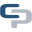

In [7]:
from selenium import webdriver
from time import sleep

url = 'https://www.google.com/search?q=cepedi+ilh%C3%A9us'

# Abre o navegador
navegador = webdriver.Chrome()

navegador.get(url)
sleep(10)

search = BeautifulSoup(navegador.page_source, 'html.parser')
#print(search.prettify())

search = search.find('div', class_='g')
if search:
    print(search.prettify())
else: 
    print('Nada encontrado')